In [1]:
# importing necesssary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

C:\Users\Cynthia\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# read data into a dataframe
df=pd.read_csv("data\Bank_Customer_Churn_Prediction.csv")

# check number of rows and colmns
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# dropping unneccessary columns
df.drop(columns=["customer_id"], inplace=True)

In [4]:
df.isnull().sum() # is there missing values?

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

There are no missing values.

In [5]:
df.duplicated().sum() #checking for duplicates

0

In [12]:
df.credit_card.unique()

array([1, 0], dtype=int64)

There are  no duplicate values.

In [13]:
# categories in each categorical column
for col in df.describe(include="object").columns:
    print(col)
    print(df[col].unique())
    print("-------"*10)

country
['France' 'Spain' 'Germany']
----------------------------------------------------------------------
gender
['Female' 'Male']
----------------------------------------------------------------------


In [126]:
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.active_member.value_counts(normalize=True) * 100

active_member
1    51.51
0    48.49
Name: proportion, dtype: float64

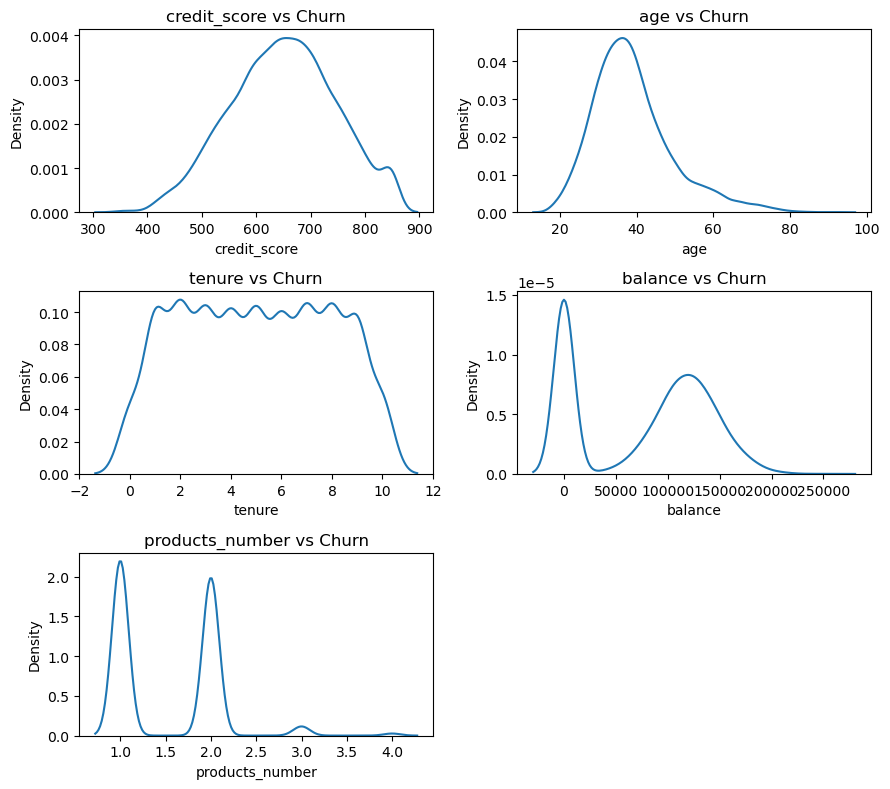

In [172]:
features=['credit_score', 'age', 'tenure', 'balance', 'products_number']
import
plt.figure(figsize=(9,8))
for i in enumerate(features):
    plt.subplot(3, 2, i[0]+1)
    
    fig=sns.kdeplot(data=df, x=f"{i[1]}")
        
    plt.title(f"{i[1]} vs Churn")
    plt.tight_layout()
    st.pyplot(fig)

<Axes: >

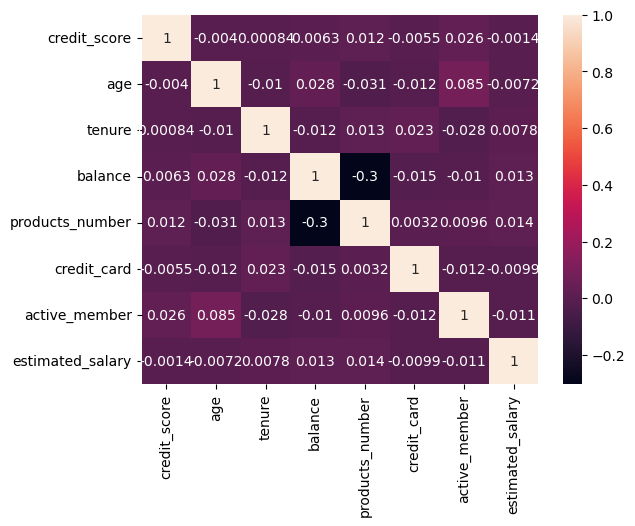

In [130]:
corr=df.select_dtypes("number").drop(columns="churn").corr()
sns.heatmap(corr, annot=True)

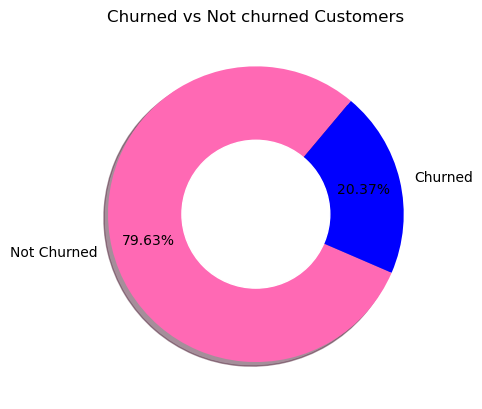

In [68]:
cls=df.churn.value_counts(normalize=True) * 100

mycolors=["hotpink", "b"]

plt.pie(clss, labels=["Not Churned", "Churned"], colors=mycolors, 
        startangle=50, shadow=True, radius=1, autopct='%1.2f%%', pctdistance=0.75)

circle=plt.Circle((0,0), radius=0.5, color='white')
c=plt.gcf()
c.gca().add_artist(circle)

plt.title("Churned vs Not churned Customers")

plt.show();

<Axes: xlabel='gender', ylabel='age'>

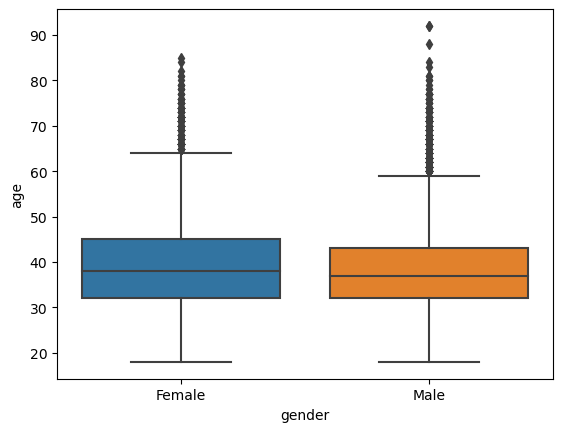

In [70]:
sns.boxplot(x="gender", y="age", data=df)

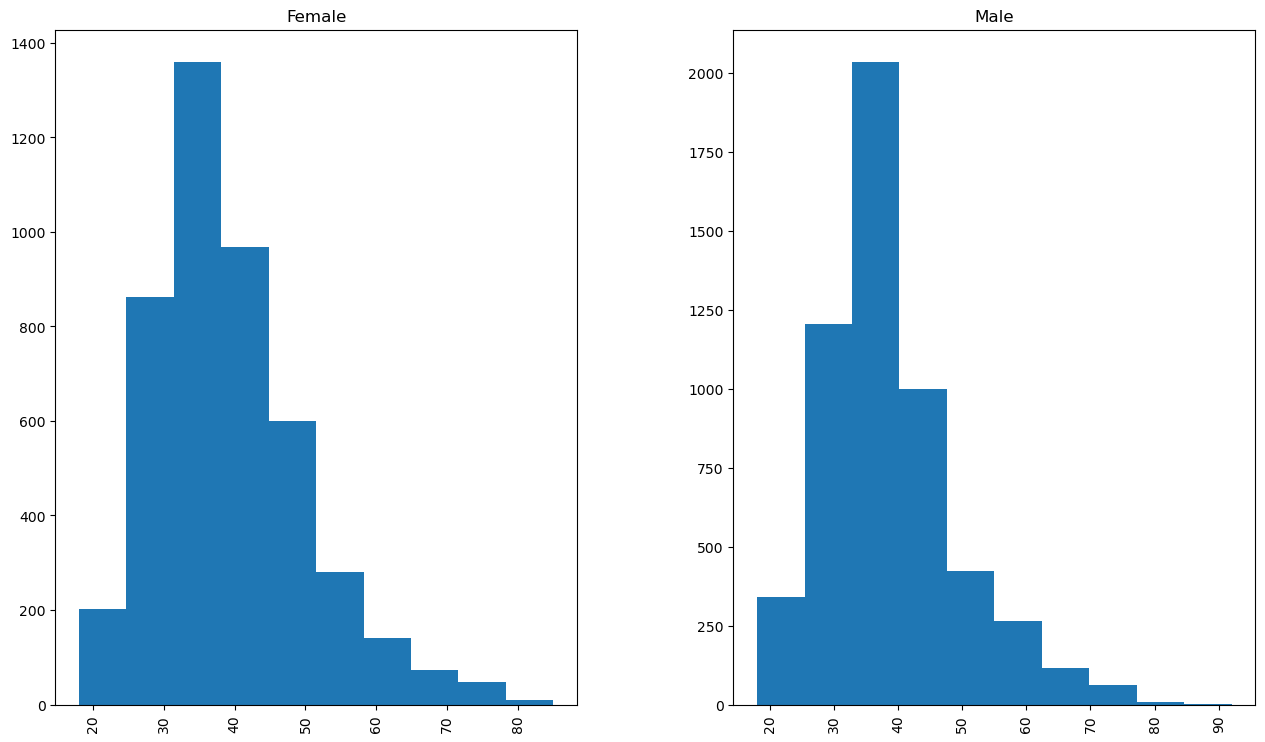

In [75]:
fig, ax=plt.subplots(figsize=(9, 6))
df.hist(by="gender", column="age", ax=ax);


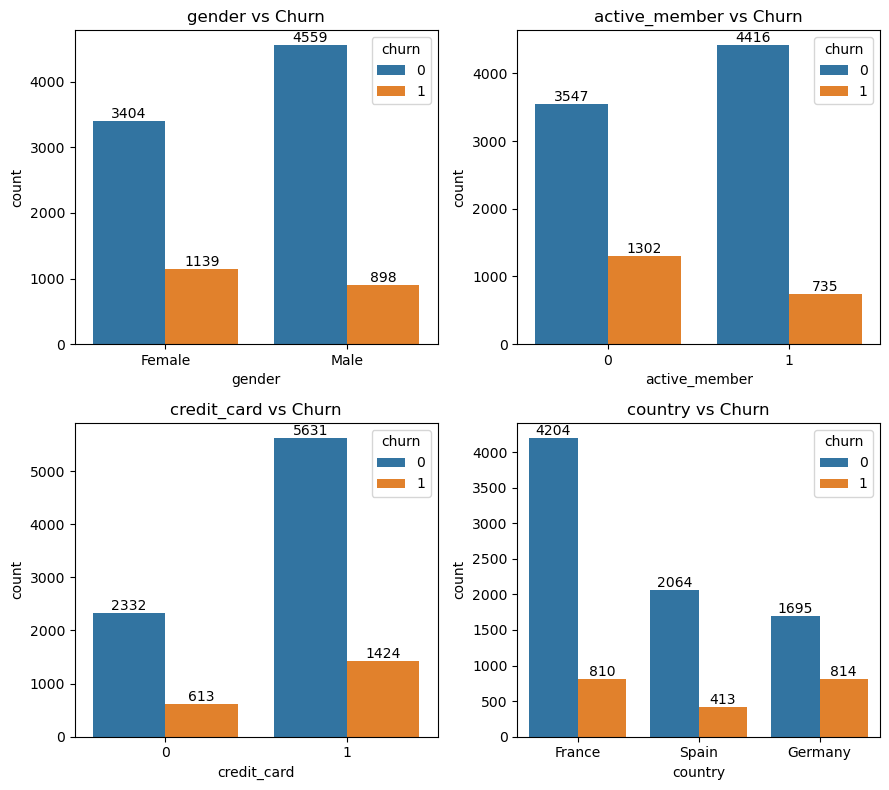

In [168]:
features=['gender', 'active_member', 'credit_card', 'country']

plt.figure(figsize=(9,8))
for i in enumerate(features):
    plt.subplot(2, 2, i[0]+1)
    
    sns.countplot(data=df, x=i[1], hue="churn")
    
    for bar in ax.containers:
        ax.bar_label(bar)
        
    plt.title(f"{i[1]} vs Churn")
    plt.tight_layout()

In [28]:
df_germany=df[df["country"]=="Germany"]
df_germany

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
15,15643966,616,Germany,Male,45,3,143129.41,2,0,1,64327.26,0
16,15737452,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
26,15736816,756,Germany,Male,36,2,136815.64,1,1,1,170041.95,0
28,15728693,574,Germany,Female,43,3,141349.43,1,1,1,100187.43,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9982,15768163,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9984,15696175,602,Germany,Male,35,7,90602.42,2,1,1,51695.41,0
9986,15581736,673,Germany,Male,47,1,183579.54,2,0,1,34047.54,0
9990,15798964,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0


In [29]:
pd.crosstab(df_germany.gender, df_germany.churn)

churn,0,1
gender,,
Female,745,448
Male,950,366


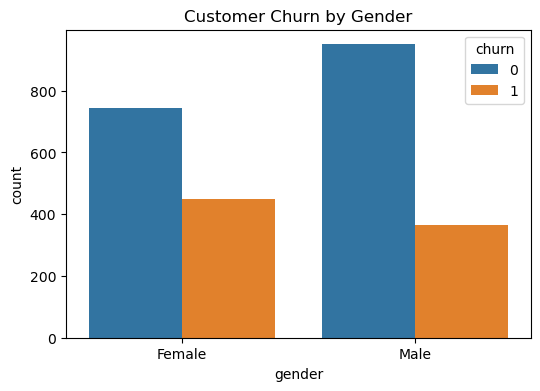

In [154]:
fig, ax=plt.subplots(figsize=(6, 4))
sns.countplot(data=df_germany, x='gender', hue="churn", ax=ax)
plt.title("Customer Churn by Gender");

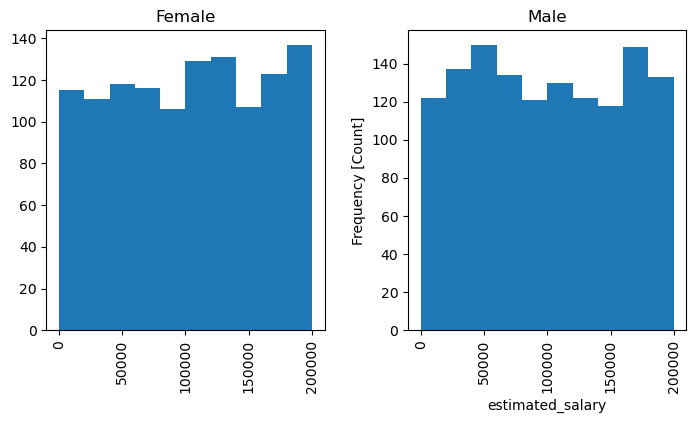

In [138]:
fig, ax=plt.subplots(figsize=(8, 4))
df_germany.hist(by="gender", column="estimated_salary", ax=ax)
plt.xlabel("estimated_salary")
plt.ylabel("Frequency [Count]");